Importing the Libraries 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

Importing the data

In [12]:
iris = pd.read_excel("flame.xlsx")
x = iris.iloc[:, [0, 1]].values

target = iris.iloc[:,2].values



Viewing the Data

In [13]:
x

array([[ 1.35, 26.65],
       [ 1.4 , 23.25],
       [ 0.85, 23.05],
       [ 0.5 , 22.35],
       [ 0.65, 21.35],
       [ 1.1 , 22.05],
       [ 1.35, 22.65],
       [ 1.95, 22.8 ],
       [ 2.4 , 22.45],
       [ 1.8 , 22.  ],
       [ 2.5 , 21.85],
       [ 2.95, 21.4 ],
       [ 1.9 , 21.25],
       [ 1.35, 21.45],
       [ 1.35, 20.9 ],
       [ 1.25, 20.35],
       [ 1.75, 20.05],
       [ 2.  , 20.6 ],
       [ 2.5 , 21.  ],
       [ 1.7 , 19.05],
       [ 2.4 , 20.05],
       [ 3.05, 20.45],
       [ 3.7 , 20.45],
       [ 3.45, 19.9 ],
       [ 2.95, 19.5 ],
       [ 2.4 , 19.4 ],
       [ 2.4 , 18.25],
       [ 2.85, 18.75],
       [ 3.25, 19.05],
       [ 3.95, 19.6 ],
       [ 2.7 , 17.8 ],
       [ 3.45, 18.05],
       [ 3.8 , 18.55],
       [ 4.  , 19.1 ],
       [ 4.45, 19.9 ],
       [ 4.65, 19.15],
       [ 4.85, 18.45],
       [ 4.3 , 18.05],
       [ 3.35, 17.3 ],
       [ 3.7 , 16.3 ],
       [ 4.4 , 16.95],
       [ 4.25, 17.4 ],
       [ 4.8 , 17.65],
       [ 5.

Viewing the target

In [14]:
target

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Ploting the data according to target 

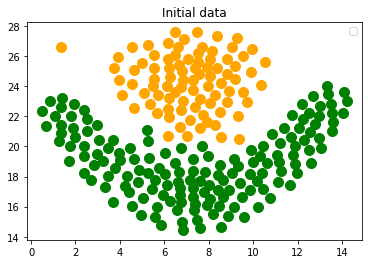

In [16]:
# plt.scatter(x[target == 0, 0], x[target == 0, 1], s = 100, c = 'purple')
plt.scatter(x[target == 1, 0], x[target == 1, 1], s = 100, c = 'orange')
plt.scatter(x[target == 2, 0], x[target == 2, 1], s = 100, c = 'green')
plt.title('Initial data')
#Plotting the centroids of the clusters


plt.legend()
plt.show()

FINDING THE BEST K BY ELBOW METHOD

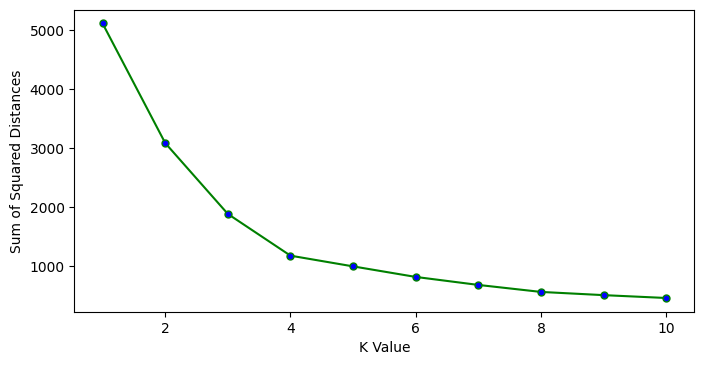

In [24]:
from sklearn.cluster import KMeans
ssd = [] # An empty list for sum of squared distances to be appended for k values 2 to 30
clusters = []
for k in range(1,11):
    model = KMeans(n_clusters=k)
    model.fit(x)
    ssd.append(model.inertia_)
    clusters.append(model)
plt.figure(figsize=(8,4),dpi=100)
plt.plot(range(1,11), ssd, marker='o', color='green', markerfacecolor='blue', markersize=5)
plt.xlabel("K Value")
plt.ylabel("Sum of Squared Distances")
  

WE CAN CLEARLY SEE THAT ELBOW IS AT 4 BUT STILL LETS CHECK THE SILHOUTTE SCORE

In [25]:
from sklearn.metrics import silhouette_score
for i in range(1,9,1):
    
    print("---------------------------------------")
    print(clusters[i])
    print("Silhouette score:",silhouette_score(x, clusters[i].predict(x)))

---------------------------------------
KMeans(n_clusters=2)
Silhouette score: 0.3781633598674282
---------------------------------------
KMeans(n_clusters=3)
Silhouette score: 0.41252990380104315
---------------------------------------
KMeans(n_clusters=4)
Silhouette score: 0.4469910179114716
---------------------------------------
KMeans(n_clusters=5)
Silhouette score: 0.40403303676970215
---------------------------------------
KMeans(n_clusters=6)
Silhouette score: 0.3764088964528707
---------------------------------------
KMeans(n_clusters=7)
Silhouette score: 0.37513613908315374
---------------------------------------
KMeans()
Silhouette score: 0.38076104175046904
---------------------------------------
KMeans(n_clusters=9)
Silhouette score: 0.35801285329164384


Applying  Kmeans 

In [26]:
kmeans = KMeans(n_clusters = 4, max_iter = 300, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

Viewing the the cluster formation

In [27]:
y_kmeans

array([0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2,
       1, 0, 3, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

Ploting the clusturing result

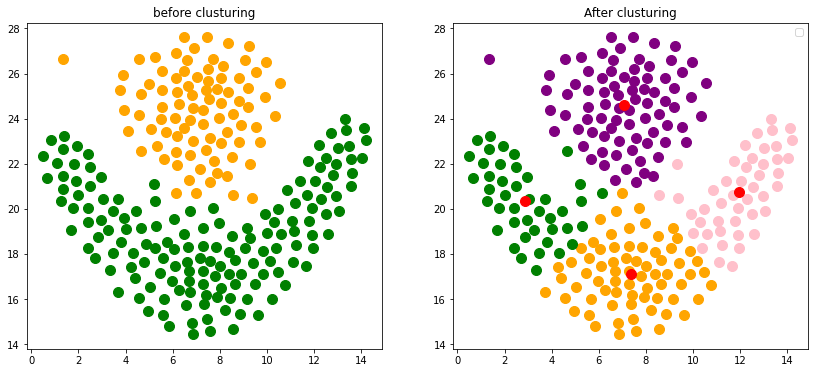

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[1].scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple')
axes[1].scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange')
axes[1].scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green')
axes[1].scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'pink')
axes[1].set_title('After clusturing')
#Plotting the centroids of the clusters
axes[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red' )
# axes[0].scatter(x[target == 0, 0], x[target == 0, 1], s = 100, c = 'purple')
axes[0].scatter(x[target == 1, 0], x[target == 1, 1], s = 100, c = 'orange')
axes[0].scatter(x[target == 2, 0], x[target == 2, 1], s = 100, c = 'green')
axes[0].set_title('before clusturing')
#Plotting the centroids of the clusters


plt.legend()
plt.show()

In [29]:
print(pd.crosstab(target,y_kmeans))

col_0   0   1   2   3
row_0                
1      80   1   2   3
2       0  69  41  43
